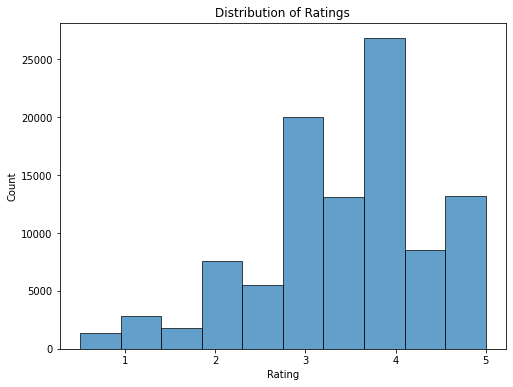


==== Customer Product Recommendation System ====
1. Get Recommendations
2. Calculate Movie Correlation
3. Exit
Enter your choice (1-3): 1
Enter User ID: 2
Top Recommendations:
1. Movie ID: 69122, Title: Hangover, The (2009), Predicted Rating: 3.5
2. Movie ID: 356, Title: Forrest Gump (1994), Predicted Rating: 3.4
3. Movie ID: 8641, Title: Anchorman: The Legend of Ron Burgundy (2004), Predicted Rating: 3.3
4. Movie ID: 4447, Title: Legally Blonde (2001), Predicted Rating: 3.2
5. Movie ID: 39, Title: Clueless (1995), Predicted Rating: 3.2

==== Customer Product Recommendation System ====
1. Get Recommendations
2. Calculate Movie Correlation
3. Exit
Enter your choice (1-3): 2
Enter Movie ID: 2
Top Correlated Movies:
╒═══════════╤═══════════════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤═══════════════════════════════════════════════════════════════════════════════╕
│   m

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from tabulate import tabulate


# Load the ratings dataset
ratings_data = pd.read_csv('C:\\Users\\91914\\Downloads\\ml-latest-small\\ml-latest-small\\ratings.csv')

# Load the movies dataset
movies_data = pd.read_csv('C:\\Users\\91914\\Downloads\\ml-latest-small\\ml-latest-small\\movies.csv')

# Merge the ratings and movies data based on 'movieId'
data = pd.merge(ratings_data, movies_data, on='movieId')

# Create a pivot table with users as rows and products as columns
pivot_table = data.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# Split the pivot table into training and test sets
train_data, test_data = train_test_split(pivot_table, test_size=0.2, random_state=42)

# Calculate the cosine similarity matrix
cosine_sim = cosine_similarity(train_data)

# Function to get top N recommendations for a given user
def get_top_n_recommendations(user_id, N=5):
    # Get the index of the user in the pivot table
    user_index = pivot_table.index.get_loc(user_id)

    # Get the similarity scores of the user with all other users
    user_sim_scores = cosine_sim[user_index]

    # Get the indices of the top N similar users
    top_similar_users = user_sim_scores.argsort()[-(N+1):-1][::-1]

    # Get the ratings given by the top N similar users
    similar_users_ratings = train_data.iloc[top_similar_users]

    # Calculate the average rating for each product
    average_ratings = similar_users_ratings.mean()

    # Get the unrated products for the user
    unrated_products = pivot_table.iloc[user_index][pivot_table.iloc[user_index] == 0].index

    # Get the top N recommended products
    top_n_recommendations = average_ratings[unrated_products].sort_values(ascending=False).head(N)

    return top_n_recommendations

# Function to display recommendations
def display_recommendations(recommendations):
    print("Top Recommendations:")
    for i, (movie_id, rating) in enumerate(recommendations.iteritems(), start=1):
        movie_title = movies_data[movies_data['movieId'] == movie_id]['title'].values[0]
        print(f"{i}. Movie ID: {movie_id}, Title: {movie_title}, Predicted Rating: {rating}")

# Function to plot the histogram of ratings
def plot_ratings_histogram(ratings):
    plt.figure(figsize=(8, 6))
    plt.hist(ratings, bins=10, edgecolor='black', alpha=0.7)
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.title('Distribution of Ratings')
    plt.show()

# Function to calculate and display movie correlation
def calculate_movie_correlation(movie_id):
    movie_ratings = pivot_table[movie_id]
    similar_movies = pivot_table.corrwith(movie_ratings)
    similar_movies = similar_movies.dropna()
    similar_movies = similar_movies.sort_values(ascending=False)
    similar_movies = pd.DataFrame(similar_movies, columns=['Correlation'])
    similar_movies = similar_movies.join(movies_data.set_index('movieId')).reset_index()
    return similar_movies

# Function to display movie correlation
def display_movie_correlation(similar_movies):
    print("Top Correlated Movies:")
    table = tabulate(similar_movies, headers='keys', showindex=False, tablefmt='fancy_grid')
    print(table)

# Plot the histogram of ratings
ratings_histogram = ratings_data['rating']
plot_ratings_histogram(ratings_histogram)

# Interactive user interface
while True:
    print("\n==== Customer Product Recommendation System ====")
    print("1. Get Recommendations")
    print("2. Calculate Movie Correlation")
    print("3. Exit")

    choice = input("Enter your choice (1-3): ")

    if choice == '1':
        user_id = input("Enter User ID: ")
        try:
            user_id = int(user_id)
            recommendations = get_top_n_recommendations(user_id, N=5)
            display_recommendations(recommendations)
        except ValueError:
            print("Invalid User ID. Please try again.")
    elif choice == '2':
        movie_id = input("Enter Movie ID: ")
        try:
            movie_id = int(movie_id)
            similar_movies = calculate_movie_correlation(movie_id)
            display_movie_correlation(similar_movies)
        except ValueError:
            print("Invalid Movie ID. Please try again.")
    elif choice == '3':
        print("Exiting...")
        break
    else:
        print("Invalid choice. Please try again.")
